/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code/Users
/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code
train loss:2.299465604970035
=== epoch:1, train acc:0.2, test acc:0.216 ===
train loss:2.2965195220280394
train loss:2.2950187990418427
train loss:2.2913223408205132
train loss:2.2830238465815493
train loss:2.2722114123099977
train loss:2.254093996892349
train loss:2.2413846551553256
train loss:2.233614221226107
train loss:2.1915163631835695
train loss:2.1738349083906203
train loss:2.16096996570017
train loss:2.0998998608593094
train loss:2.0819529031889097
train loss:2.0518998686694863
train loss:1.9737731547164443
train loss:1.9533915824550967
train loss:1.880645510937981
train loss:1.8683866728324445
train loss:1.7398436128472854
train loss:1.668821303102265
train loss:1.5074325684409664
train loss:1.5575313872118435
train loss:1.4868180693799031
train loss:1.3576092167507718
train loss:1.3484557258967365
train loss:1.1630778989363582
train loss:1.144

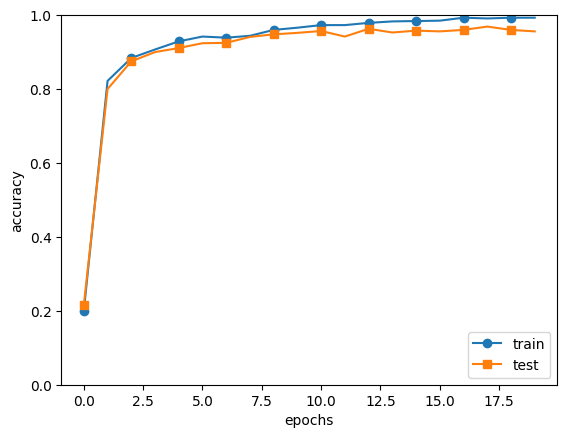

In [4]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

#시간이 오래걸려서 데이터좀 줄임
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                    epochs=max_epochs, mini_batch_size=100,
                    optimizer='Adam', optimizer_param={'lr':0.001},
                    evaluate_sample_num_per_epoch=1000)

trainer.train()


#매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

#그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker = 'o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker = 's', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()